# Statistics about dataset

In [3]:

import pandas as pd
import numpy as np

# base_path = "dataset/casual_sparsity/"

df = pd.read_csv("dataset/satelliteData.csv")

df = df[ ( df["folder"] == "optimal" )  & (df["DEL"] == 1) & (df["pixelBurned"] > 2500)] # & (df["pixelBurned"] > 3000)
print(f"Totale immagini: {len(df)}")
dfEMSR = df[["EMSR", "AOI"]]
dfEMSR_grouped = dfEMSR.groupby("EMSR")

dfGrouped = df.groupby("EMSR").size().reset_index(name='Size')
# dfGrouped = dfGrouped.sample(frac=1) # shuffle randomly the data
dfGrouped = dfGrouped.sort_values("Size", ascending=False) # sort values based on size
print(f"Totale EMSR: {len(dfGrouped)}")
print(dfGrouped[:15].to_string(index=False))

lenTrain = int(len(df)*0.65)
lenTest = int(len(df)*0.15)
lenVal = int(len(df) - lenTest - lenTrain)
print(f"Totale: {len(df)}, train: {lenTrain}, test: {lenTest}, val: {lenVal}")

sumTrain = 0
sumTest = 0
train_list_emsr = []
test_list_emsr = []
val_list_emsr = []

for index, row in dfGrouped.iterrows():
    if sumTrain <= lenTrain:
        train_list_emsr.append(row["EMSR"])
        sumTrain += row["Size"]
    elif sumTrain >= lenTrain and sumTest <= lenTest:
        test_list_emsr.append(row["EMSR"])
        sumTest += row["Size"]
    elif sumTest >= lenTest:
        val_list_emsr.append(row["EMSR"])

print(train_list_emsr)
print(test_list_emsr)
print(val_list_emsr)
print(len(train_list_emsr))
print(len(test_list_emsr))
print(len(val_list_emsr))

dfTest = pd.DataFrame()
dfVal = pd.DataFrame()
dfTrain = pd.DataFrame()

for index, row in df.iterrows():
    if row["EMSR"] in train_list_emsr:
        dfTrain = dfTrain.append(row, ignore_index=True)
    if row["EMSR"] in test_list_emsr:
        dfTest = dfTest.append(row, ignore_index=True)
    if row["EMSR"] in val_list_emsr:
        dfVal = dfVal.append(row, ignore_index=True)
# Print the sub-dataframes
# for i, df_group in enumerate(different_EMSR):
#     print(f'df{i+1}:')
#     print(df_group["EMSR"])


# dfTest, dfVal, dfTrain = np.split(dfGrouped, frac=[0.2, 0.2, 0.6])

print(f"Train: {len(dfTrain)}")
print(f"Validation: {len(dfVal)}")
print(f"Test: {len(dfTest)}")

# ATTENZIONE A SCOMMENTARE
# dfTrain.to_csv(base_path + "satelliteDataTrain.csv", index=False)
# dfVal.to_csv(base_path + "satelliteDataVal.csv", index=False)
# dfTest.to_csv(base_path + "satelliteDataTest.csv", index=False)
df = df.drop(columns=["interval_startDate","interval_endDate","post_fire_acquisition","left_Long","bottom_Lat","right_Long","top_Lat"])
df.to_csv("dataset/cross_validation/satelliteData.csv", index=False)



Totale immagini: 448
Totale EMSR: 169
   EMSR  Size
EMSR647    58
EMSR250    38
EMSR213    32
EMSR533    18
EMSR529    13
EMSR602    11
EMSR535    10
EMSR408    10
EMSR523     8
EMSR207     7
EMSR579     7
EMSR534     6
EMSR214     6
EMSR253     6
EMSR527     5
Totale: 448, train: 291, test: 67, val: 90
['EMSR647', 'EMSR250', 'EMSR213', 'EMSR533', 'EMSR529', 'EMSR602', 'EMSR535', 'EMSR408', 'EMSR523', 'EMSR207', 'EMSR579', 'EMSR534', 'EMSR214', 'EMSR253', 'EMSR527', 'EMSR254', 'EMSR589', 'EMSR596', 'EMSR599', 'EMSR618', 'EMSR625', 'EMSR303', 'EMSR463', 'EMSR248', 'EMSR217', 'EMSR396', 'EMSR538', 'EMSR298', 'EMSR369', 'EMSR580', 'EMSR500', 'EMSR209']
['EMSR368', 'EMSR578', 'EMSR457', 'EMSR581', 'EMSR510', 'EMSR582', 'EMSR220', 'EMSR590', 'EMSR401', 'EMSR592', 'EMSR426', 'EMSR506', 'EMSR571', 'EMSR281', 'EMSR619', 'EMSR291', 'EMSR528', 'EMSR300', 'EMSR539', 'EMSR227', 'EMSR537', 'EMSR591', 'EMSR588', 'EMSR587', 'EMSR583', 'EMSR540', 'EMSR573', 'EMSR541', 'EMSR221', 'EMSR542', 'EMSR543', 

/tmp/ipykernel_4444/2259851022.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTrain = dfTrain.append(row, ignore_index=True)
/tmp/ipykernel_4444/2259851022.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfVal = dfVal.append(row, ignore_index=True)
/tmp/ipykernel_4444/2259851022.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTest = dfTest.append(row, ignore_index=True)


Train: 293
Validation: 87
Test: 68


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/satelliteData.csv")
df = df[ (df["folder"] == "optimal") & (df["DEL"] == 1) & (df["pixelBurned"] > 2500)]
df = df.drop(columns=["interval_startDate","interval_endDate","left_Long","bottom_Lat","right_Long","top_Lat"])

counts = df['country'].value_counts()
counts_sorted = counts.sort_values(ascending=False)
df = df.loc[df['country'].isin(counts_sorted.index)].sort_values(by=['country'])

df = df.reset_index(drop=True)
print(f"Totale immagini Delineation: \t{len(df)}")
# print(df[:10])

df = pd.read_csv("dataset/satelliteData.csv")
df = df[ (df["folder"] == "optimal") & (df["GRA"] == 1) & (df["pixelBurned"] > 2500)]
df = df.drop(columns=["interval_startDate","interval_endDate","left_Long","bottom_Lat","right_Long","top_Lat"])

counts = df['country'].value_counts()
counts_sorted = counts.sort_values(ascending=False)
df = df.loc[df['country'].isin(counts_sorted.index)].sort_values(by=['country'])

df = df.reset_index(drop=True)
print(f"Totale immagini Grading: \t{len(df)}")




Totale immagini Delineation: 	448
Totale immagini Grading: 	334


In [5]:
# country
dfGrouped = df.groupby("country").size().reset_index(name='Size')
# dfGrouped = dfGrouped.reset_index(drop=True)
print(dfGrouped.sort_values(by=["Size"], ascending=False).to_string(index=False))


         country  Size
           Spain    90
        Portugal    68
           Italy    55
          Greece    42
         Algeria    18
          France    15
         Germany     7
 North Macedonia     5
         Albania     4
          Sweden     4
  United Kingdom     4
         Lebanon     3
          Mexico     3
       Australia     3
        Slovenia     2
         Hungary     2
       Greenland     1
         Georgia     1
Falkland Islands     1
          Latvia     1
         Czechia     1
          Poland     1
          Cyprus     1
         Croatia     1
         Ukraine     1


## Dataset subdivision in folds

In [9]:
import pprint
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/cross_validation/satelliteData_6folds.csv")
fold_list = df.groupby('fold')

# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['country']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

# fold counting
print("Folds: count")
sum_dict = {}

for key, inner_dict in result_dict.items():
    inner_sum = sum(inner_dict.values())
    sum_dict[key] = inner_sum


for key,value in sum_dict.items():
    print(key, ':', value)

{0: {'Albania': 4,
     'France': 7,
     'Italy': 21,
     'Portugal': 14,
     'Spain': 21,
     'Sweden': 4,
     'United Kingdom': 1},
 1: {'Portugal': 56, 'Spain': 22},
 2: {'Croatia': 1, 'France': 5, 'Italy': 34, 'Slovenia': 2, 'Spain': 18},
 3: {'Albania': 5, 'Cyprus': 1, 'Greece': 43, 'North Macedonia': 13},
 4: {'Albania': 5,
     'Czechia': 1,
     'Falkland Islands': 1,
     'France': 5,
     'Georgia': 1,
     'Germany': 10,
     'Greece': 1,
     'Greenland': 2,
     'Hungary': 2,
     'Italy': 8,
     'Latvia': 2,
     'Mexico': 4,
     'Montenegro': 1,
     'North Macedonia': 1,
     'Poland': 2,
     'Serbia': 1,
     'Spain': 3,
     'Ukraine': 1,
     'United Kingdom': 2},
 5: {'Chile': 58},
 6: {'Algeria': 18, 'Australia': 12, 'Lebanon': 3, 'Spain': 26, 'Tunisia': 2}}
Folds: count
0 : 72
1 : 78
2 : 60
3 : 62
4 : 53
5 : 58
6 : 61


In [10]:
# percentage of area burned per fold
df["area"] = df["width"] * df["height"]
dfGrouped_burn = df.groupby("fold")["pixelBurned"].sum()
dfGrouped_total= df.groupby("fold")["area"].sum()
dfGrouped = dfGrouped_burn/dfGrouped_total * 100
dfGrouped

# finire col datetime
# finire col argparse per numero fold in test

fold
0    14.330010
1    27.055616
2    17.450053
3    20.874878
4    25.699147
5    17.143755
6    22.180799
dtype: float64

In [11]:
# print distribution
fold_list = df.groupby('fold')
# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['country']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

{0: {'Albania': 4,
     'France': 7,
     'Italy': 21,
     'Portugal': 14,
     'Spain': 21,
     'Sweden': 4,
     'United Kingdom': 1},
 1: {'Portugal': 56, 'Spain': 22},
 2: {'Croatia': 1, 'France': 5, 'Italy': 34, 'Slovenia': 2, 'Spain': 18},
 3: {'Albania': 5, 'Cyprus': 1, 'Greece': 43, 'North Macedonia': 13},
 4: {'Albania': 5,
     'Czechia': 1,
     'Falkland Islands': 1,
     'France': 5,
     'Georgia': 1,
     'Germany': 10,
     'Greece': 1,
     'Greenland': 2,
     'Hungary': 2,
     'Italy': 8,
     'Latvia': 2,
     'Mexico': 4,
     'Montenegro': 1,
     'North Macedonia': 1,
     'Poland': 2,
     'Serbia': 1,
     'Spain': 3,
     'Ukraine': 1,
     'United Kingdom': 2},
 5: {'Chile': 58},
 6: {'Algeria': 18, 'Australia': 12, 'Lebanon': 3, 'Spain': 26, 'Tunisia': 2}}


## Dataset displayed on map

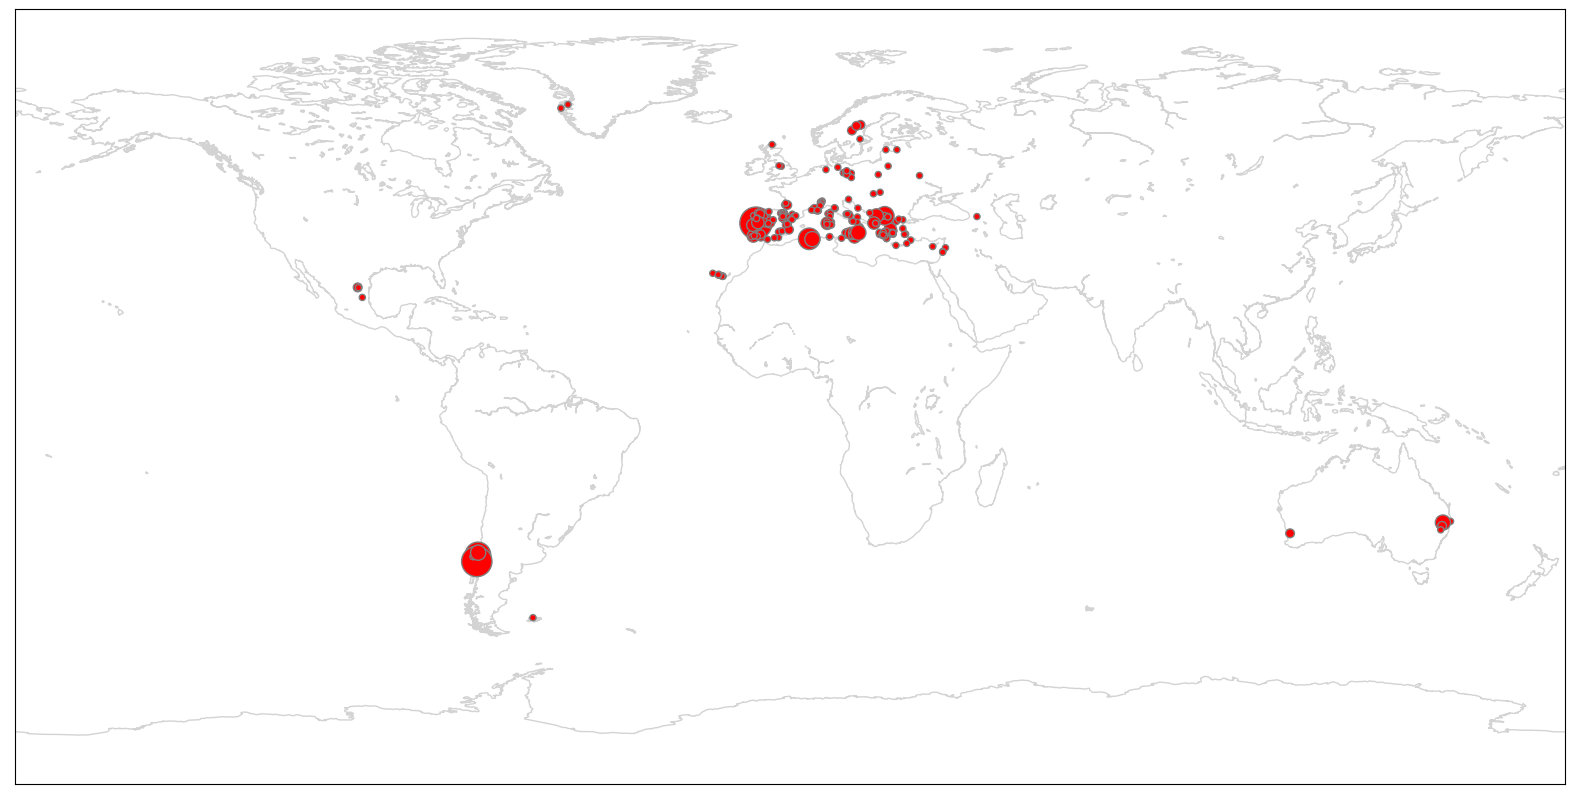

In [4]:
import pprint
import pandas as pd
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

original_path = "dataset/satelliteData.csv"
# path = "dataset/casual_sparsity/satelliteDataTrain.csv"

# ALL EMSR IN ONE MAP
df = pd.read_csv(original_path)
df = df[ (df["folder"] == "optimal") & (df["DEL"] == 1) & (df["pixelBurned"] > 2500)]
df = df.drop(columns=["interval_startDate","interval_endDate","left_Long","bottom_Lat","right_Long","top_Lat"])

grouped_df = df.groupby(["EMSR", "AOI"]).agg({"centerBoxLong": "mean", "centerBoxLat": "mean", "AOI": "count"})
grouped_df = grouped_df.rename(columns={"weight": "mean_weight", "AOI": "count"})


lat = grouped_df['centerBoxLat'].values
lon = grouped_df['centerBoxLong'].values
count = grouped_df['count'].values

fig = plt.figure(figsize=(20, 20))

m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# m.shadedrelief()
m.drawcoastlines(color='lightgray', zorder=1)
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

m.scatter(lon, lat, latlon=True,
          s=count*20,
          color ='red', alpha=1, edgecolors='gray')

# create colorbar and legend
plt.clim(3, 7)

# path = path.replace(".csv", ".png")
# plt.savefig(path, bbox_inches='tight', pad_inches=0)


Totale immagini: 445


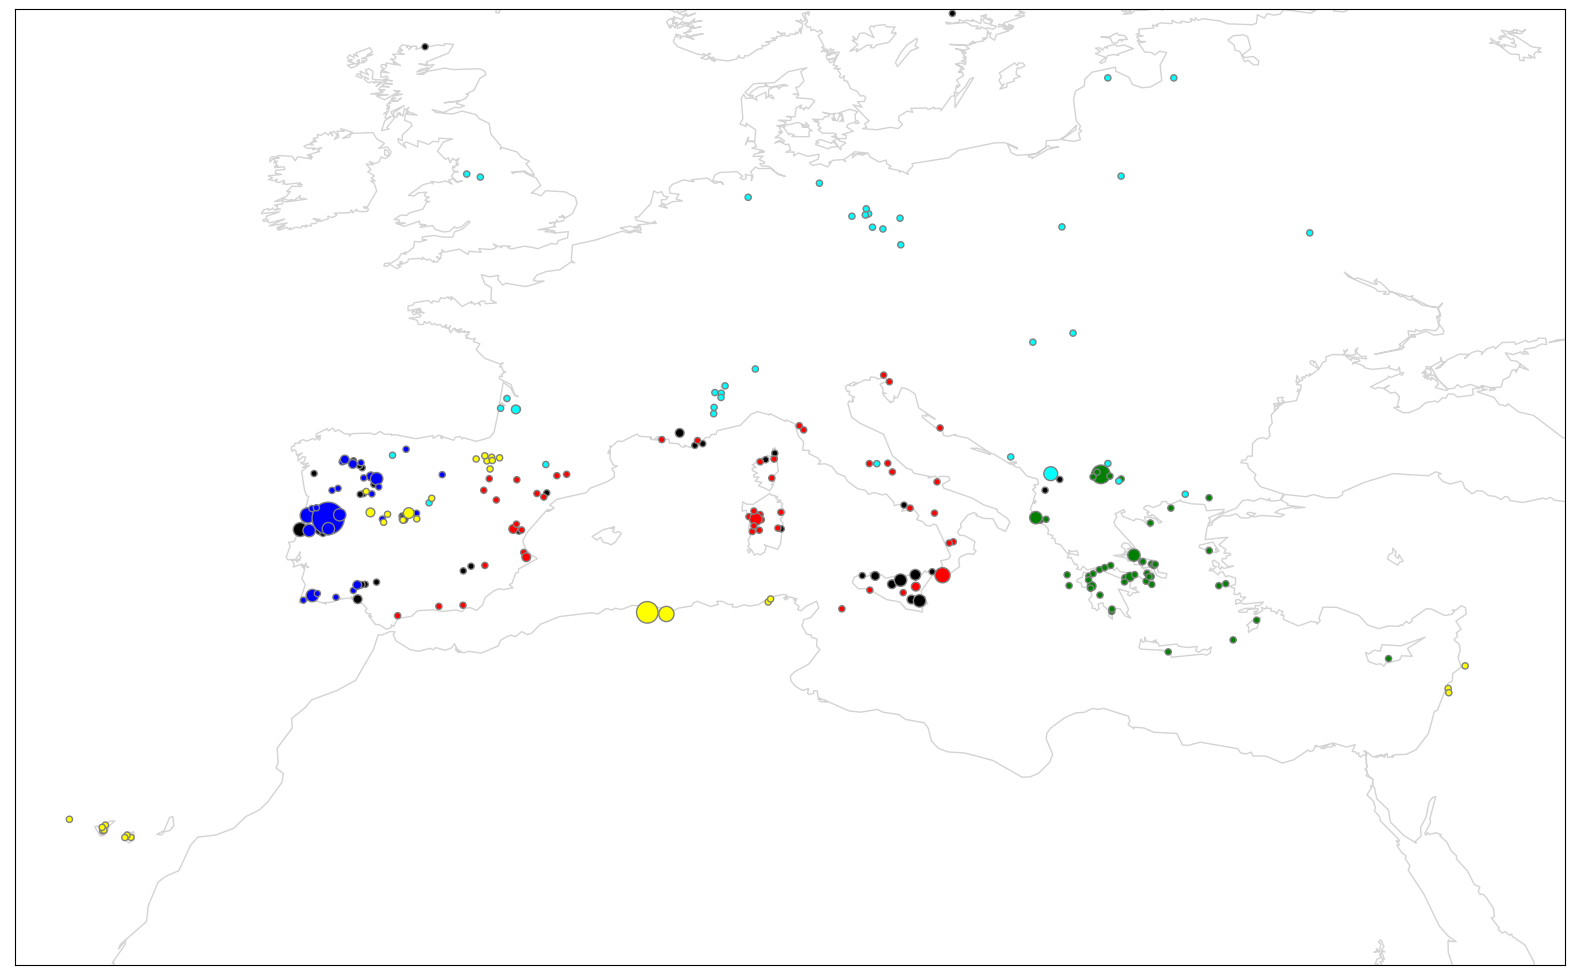

{0: {'Albania': 4,
     'France': 7,
     'Italy': 21,
     'Portugal': 14,
     'Spain': 19,
     'Sweden': 4,
     'United Kingdom': 1},
 1: {'Portugal': 57, 'Spain': 22},
 2: {'Croatia': 1, 'France': 5, 'Italy': 34, 'Slovenia': 2, 'Spain': 19},
 3: {'Albania': 5, 'Cyprus': 1, 'Greece': 43, 'North Macedonia': 13},
 4: {'Albania': 5,
     'Czechia': 1,
     'Falkland Islands': 1,
     'France': 5,
     'Georgia': 1,
     'Germany': 10,
     'Greece': 1,
     'Greenland': 2,
     'Hungary': 2,
     'Italy': 8,
     'Latvia': 2,
     'Mexico': 4,
     'Montenegro': 1,
     'North Macedonia': 1,
     'Poland': 2,
     'Serbia': 1,
     'Spain': 3,
     'Ukraine': 1,
     'United Kingdom': 2},
 5: {'Chile': 58},
 6: {'Algeria': 18, 'Australia': 12, 'Lebanon': 3, 'Spain': 27, 'Tunisia': 2}}
----------------------------------
{0: {'BSk': 5, 'Cfa': 1, 'Cfb': 1, 'Csa': 38, 'Csb': 20, 'Dfb': 2, 'Dfc': 3},
 1: {'BSk': 4, 'Cfb': 1, 'Cfc': 1, 'Csa': 27, 'Csb': 44, 'Dsb': 2},
 2: {'BSk': 17, 'Cfa'

In [18]:
import pprint
import pandas as pd
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

path = "dataset/cross_validation/satelliteData_6folds.csv"
df = pd.read_csv(path)
print(f"Totale immagini: {len(df)}")

grouped_df = df.groupby(["fold", "EMSR", "AOI"]).agg({"centerBoxLong": "mean", "centerBoxLat": "mean", "AOI": "count"})
grouped_df = grouped_df.rename(columns={"weight": "mean_weight", "AOI": "count"})
grouped_df = grouped_df.reset_index()

lat = grouped_df['centerBoxLat'].values
lon = grouped_df['centerBoxLong'].values
count = grouped_df['count'].values

colors = {
    0: "black",
    1: "blue",
    2: "red",
    3: "green",
    4: "cyan",
    5: "magenta",
    6: "yellow",
    7: "black",
    8: "orange",
    9: "purple",
    10: "pink"

}

grouped_df['color'] = grouped_df['fold'].map(colors)

fig = plt.figure(figsize=(20, 20))

# Europe
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=23, urcrnrlat=60,
            llcrnrlon=-20, urcrnrlon=40, )

# # World
# m = Basemap(projection='cyl', resolution='c',
#             llcrnrlat=-75, urcrnrlat=75,
#             llcrnrlon=-130, urcrnrlon=160, )

# m.shadedrelief()
m.drawcoastlines(color='lightgray', zorder=1)
# m.drawcountries(color='gray')


m.scatter(lon, lat, latlon=True,
        color = grouped_df["color"].values,
        s=count*20, alpha=1, edgecolors='gray')

# save
path = path.replace(".csv", ".png")
plt.savefig(path, bbox_inches='tight', pad_inches=0)

plt.show()

#  SHOW DISTRIBUTION PER FOLD
fold_list = df.groupby('fold')
# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['country']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

print("----------------------------------")

#  SHOW DISTRIBUTION PER FOLD
fold_list = df.groupby('fold')
# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['koppen_subgroup']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

# fold counting
print("Folds: count")
sum_dict = {}

for key, inner_dict in result_dict.items():
    inner_sum = sum(inner_dict.values())
    sum_dict[key] = inner_sum


for key,value in sum_dict.items():
    print(key, ':', value)

In [12]:
# proportion pixel burned inside crop
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

df = pd.read_csv("dataset/cross_validation/satelliteData_6folds.csv")

df = df[ ((df["folder"] == "optimal") | (df["folder"] == "subOptimal_cloudyClean" )) & (df["DEL"] == 1) & (df["pixelBurned"] > 0)]
# df = df.drop(columns=["centerBoxLong", "country", "resolution_x", "resolution_y", "centerBoxLat", "activationDate", "GRA", "DEL", "FEP", "folder", "interval_startDate","interval_endDate","left_Long","bottom_Lat","right_Long","top_Lat", "koppen_group", "koppen_subgroup"])
df = df.drop(columns=["folderPath", "centerBoxLong", "country", "resolution_x", "resolution_y", "centerBoxLat", "activationDate", "GRA", "DEL", "FEP", "folder", "koppen_group", "koppen_subgroup"])

crop = 512*512

df['proportion'] = df['pixelBurned'] / crop
df = df[ df["proportion"] < 0.03 ]

df = df.sort_values(by=["proportion"], ascending=True,)
# # print(df["pixelBurned"])
print(f"Immagini: {len(df)}")
print(df)

Immagini: 20
        EMSR    AOI  height  width  pixelBurned  fold  proportion
1    EMSR207  AOI01    1448   1973         2629     0    0.010029
225  EMSR523  AOI08     614    798         2733     2    0.010426
379  EMSR626  AOI01     712    802         2765     2    0.010548
53   EMSR217  AOI04     696    658         2815     0    0.010738
189  EMSR430  AOI01     656    651         2835     6    0.010815
37   EMSR213  AOI17     845   1017         3095     2    0.011806
122  EMSR290  AOI03     736    552         3569     0    0.013615
409  EMSR647  AOI02    1811   1942         3762     5    0.014351
152  EMSR368  AOI01    1416   1118         3881     0    0.014805
172  EMSR396  AOI03    1311    568         3962     6    0.015114
438  EMSR647  AOI07    1646   1595         4347     5    0.016582
192  EMSR440  AOI01     730    952         4420     4    0.016861
145  EMSR360  AOI01     683    571         5337     6    0.020359
125  EMSR295  AOI01     730    643         5623     4    0.0214

## Correlation and PCA

2060604
   layer_1  layer_2  layer_3     layer_4  layer_5     layer_6  layer_7  \
0    616.0    493.0    411.0  384.000031    423.0  406.000031    392.0   
1    616.0    534.0    429.0  389.000000    423.0  406.000031    392.0   
2    616.0    541.0    442.0  391.000000    424.0  403.000000    405.0   
3    616.0    575.0    477.0  447.000000    424.0  403.000000    405.0   
4    612.0    688.0    530.0  498.000000    475.0  422.000000    423.0   

      layer_8  layer_9  layer_10    layer_11  layer_12  label  
0  344.000000    418.0     311.0  370.000000     342.0      0  
1  364.000000    418.0     311.0  370.000000     342.0      0  
2  370.999969    414.0     311.0  370.999969     331.0      0  
3  388.000000    414.0     311.0  370.999969     331.0      0  
4  463.000000    414.0     309.0  380.000000     332.0      0  


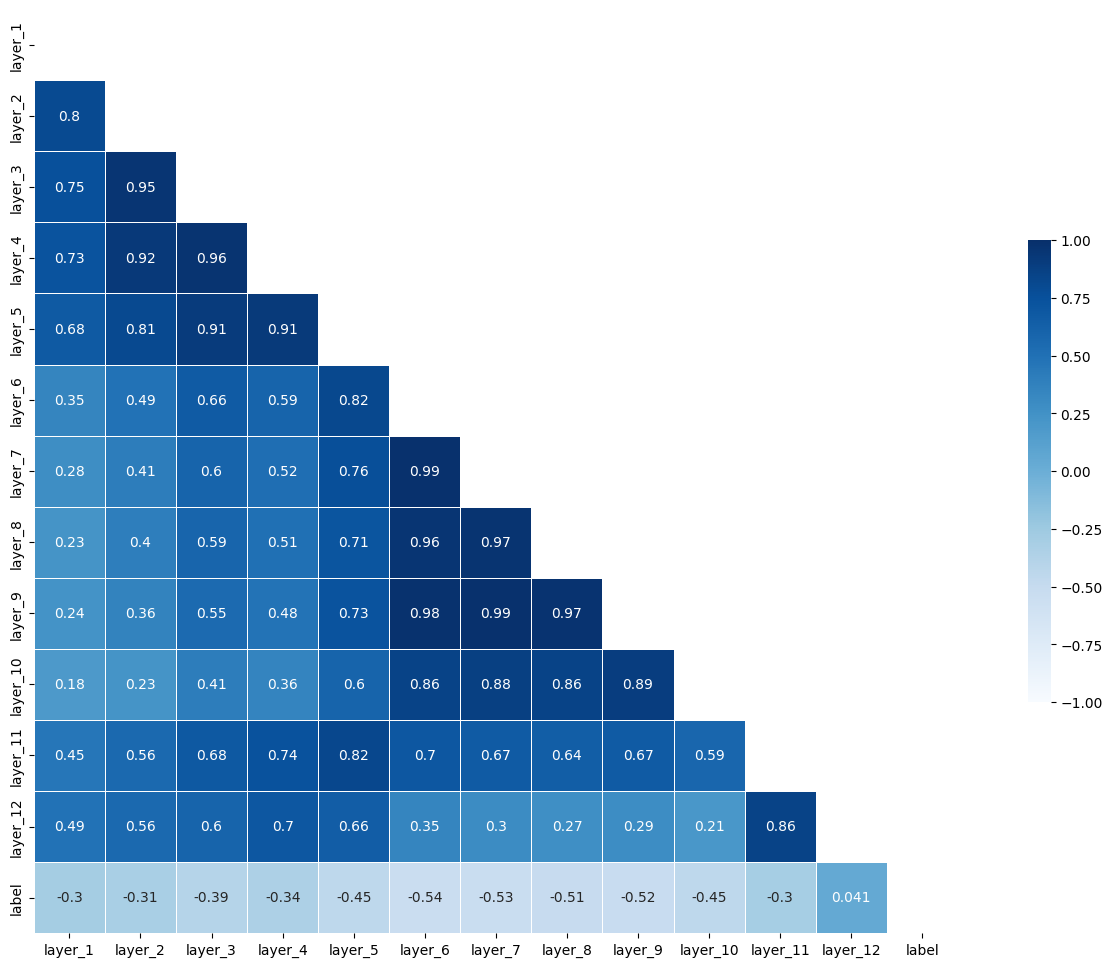

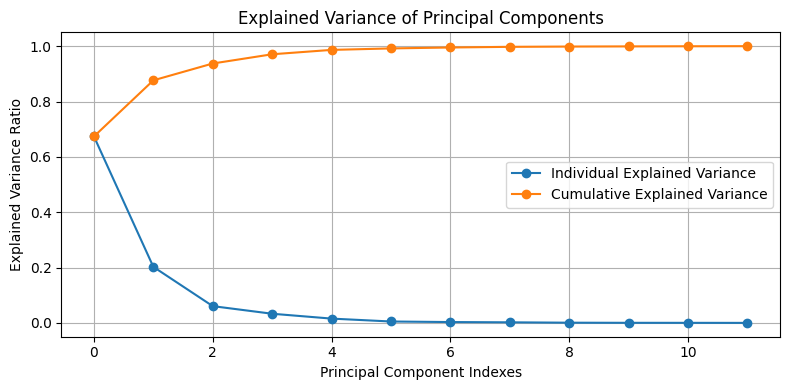

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Cumulative Explained Variance,67.38%,87.65%,93.74%,97.07%,98.65%,99.19%,99.52%,99.76%,99.86%,99.92%,99.97%,100.00%


In [13]:
import rasterio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

number = 382
tiff_path = f"../../data/dataOptimal/EMSR{number}/AOI01/EMSR{number}_AOI01_01/EMSR{number}_AOI01_01_S2L2A.tiff"
tiff_mask_path = f"../../data/dataOptimal/EMSR{number}/AOI01/EMSR{number}_AOI01_01/EMSR{number}_AOI01_01_DEL.tif"

# tiff image
with rasterio.open(tiff_path) as src:
    image = src.read()*10000

image = image.transpose(1, 2, 0) # (12,H,W) -> (H,W,12)
pixels_image = image.reshape(-1, image.shape[-1])

column_names = [f"layer_{i+1}" for i in range(image.shape[-1])]

# mask
with rasterio.open(tiff_mask_path) as src:
    image_mask = src.read()

image_mask = image_mask.transpose(1, 2, 0)
pixels_mask = image_mask.reshape(-1, image_mask.shape[-1])
pixels_mask = pixels_mask.squeeze()

df = pd.DataFrame(pixels_image, columns=column_names)
df["label"] = pixels_mask

print(len(df))
print(df.head())


# --- Correlation ---
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar


# --- PCA ---
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import PCA

scaler = MinMaxScaler()

# Apply the scaler to the dataframe
df = df.drop(columns="label")
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

pc = len(df_scaled.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(df_scaled)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]